In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import utils
import re
%config InlineBackend.figure_format = 'svg'

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_1 = pd.read_csv('/content/drive/MyDrive/Учебная/Internship_NMIC/dataset_pht3_send.csv', index_col=0)

In [ ]:
data_1.head()

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
id_ответа,,,,,,,,,,,,,,,,,,,,
1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...


In [ ]:
data_1.size

4976640

In [ ]:
data_1.shape

(248832, 20)

In [ ]:
data_1.count()

Раса                                                        248832
Пол                                                         248832
Возраст                                                     248832
Статус курения                                              248832
ECOG                                                        248832
Есть опухолевая нагрузка? (симптомная опухоль)              248832
Ко-мутации KRAS                                             248832
Ко-мутации p53.                                             248832
Ко-мутации STK11                                            248832
Ко-мутации KEAP1                                            248832
Срок от окончания ХЛТ                                       248832
Молекулярный статус (только для неплоскоклеточного рака)    248832
PD-L1 статус                                                248832
Предпочтение пациента по ответу на терапию                  248832
Ответ эксперта (Лактионов)                                  24

In [ ]:
data_1.dtypes

Раса                                                        object
Пол                                                         object
Возраст                                                     object
Статус курения                                              object
ECOG                                                        object
Есть опухолевая нагрузка? (симптомная опухоль)              object
Ко-мутации KRAS                                             object
Ко-мутации p53.                                             object
Ко-мутации STK11                                            object
Ко-мутации KEAP1                                            object
Срок от окончания ХЛТ                                       object
Молекулярный статус (только для неплоскоклеточного рака)    object
PD-L1 статус                                                object
Предпочтение пациента по ответу на терапию                  object
Ответ эксперта (Лактионов)                                  ob

In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248832 entries, 1 to 248832
Data columns (total 20 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   Раса                                                      248832 non-null  object
 1   Пол                                                       248832 non-null  object
 2   Возраст                                                   248832 non-null  object
 3   Статус курения                                            248832 non-null  object
 4   ECOG                                                      248832 non-null  object
 5   Есть опухолевая нагрузка? (симптомная опухоль)            248832 non-null  object
 6   Ко-мутации KRAS                                           248832 non-null  object
 7   Ко-мутации p53.                                           248832 non-null  object
 8   Ко-мутации STK

In [ ]:
data_1.describe()

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
count,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832
unique,3,2,2,3,2,2,2,2,2,2,3,6,3,2,4,2,2,2,5,11
top,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,False,False,0,0
freq,82944,124416,124416,82944,124416,124416,124416,124416,124416,124416,82944,41472,82944,124416,140544,158976,158976,179712,103680,62208


In [ ]:
data_1.head(20)

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
id_ответа,,,,,,,,,,,,,,,,,,,,
1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
6,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,не исследовались,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
7,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,EGFR редкий вариант,Не исследовался,Результативность лечения,Наблюдение,True,False,False,0,"Возможна низкая эффективность Дурвалумаба, Оси..."
8,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,EGFR редкий вариант,Не исследовался,Результативность лечения,Наблюдение,True,False,False,0,"Возможна низкая эффективность Дурвалумаба, Оси..."
9,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,EGFR редкий вариант,Не исследовался,Результативность лечения,Наблюдение,True,False,False,0,0


In [ ]:
data_1.describe(include=['O'])

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Альтернатива, если 50% - обязательно",Комментарий
count,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832
unique,3,2,2,3,2,2,2,2,2,2,3,6,3,2,4,5,11
top,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,0,0
freq,82944,124416,124416,82944,124416,124416,124416,124416,124416,124416,82944,41472,82944,124416,140544,103680,62208


In [ ]:
data_1

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
id_ответа,,,,,,,,,,,,,,,,,,,,
1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248828,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,нет,от 43 до 60 дней,EGFR ex21,Более 1%,сохранение качества жизни,Наблюдение,False,False,True,Осимертиниб,"Возможна низкая эффективность Дурвалумаба, Оси..."
248829,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,нет,более 61 дня,EGFR ex21,Более 1%,сохранение качества жизни,Наблюдение,True,False,False,0,0
248830,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,нет,до 42 дней,ALK позитивный,Более 1%,сохранение качества жизни,Алектиниб,False,False,True,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але..."


In [ ]:
data_1.columns

Index(['Раса', 'Пол', 'Возраст', 'Статус курения', 'ECOG',
       'Есть опухолевая нагрузка? (симптомная опухоль)', 'Ко-мутации KRAS',
       'Ко-мутации p53.', 'Ко-мутации STK11', 'Ко-мутации KEAP1',
       'Срок от окончания ХЛТ',
       'Молекулярный статус (только для неплоскоклеточного рака)',
       'PD-L1 статус', 'Предпочтение пациента по ответу на терапию',
       'Ответ эксперта (Лактионов)', 'Поставьте галочку, если уверены на 100%',
       'Если 75%', 'Если 50%', 'Альтернатива, если 50% - обязательно',
       'Комментарий'],
      dtype='object')

In [ ]:
data_1.nunique()

Раса                                                         3
Пол                                                          2
Возраст                                                      2
Статус курения                                               3
ECOG                                                         2
Есть опухолевая нагрузка? (симптомная опухоль)               2
Ко-мутации KRAS                                              2
Ко-мутации p53.                                              2
Ко-мутации STK11                                             2
Ко-мутации KEAP1                                             2
Срок от окончания ХЛТ                                        3
Молекулярный статус (только для неплоскоклеточного рака)     6
PD-L1 статус                                                 3
Предпочтение пациента по ответу на терапию                   2
Ответ эксперта (Лактионов)                                   4
Поставьте галочку, если уверены на 100%                

In [ ]:
for name, values in data_1.items():
  print("Столбец",name, ":", data_1[name].unique())

Столбец Раса : ['Азиатская' 'Европейская' 'Другая']
Столбец Пол : [' Мужской' ' Женский']
Столбец Возраст : [' До 70' ' >70']
Столбец Статус курения : [' В настоящее время'
 ' Курение в прошлом (бросил более 1 месяца до 1 года)'
 ' Курение в прошлом (бросил более 1 года)']
Столбец ECOG : [' 0-1' '2']
Столбец Есть опухолевая нагрузка? (симптомная опухоль) : [' да' ' нет']
Столбец Ко-мутации KRAS : [' да' ' нет']
Столбец Ко-мутации p53. : [' да' ' нет']
Столбец Ко-мутации STK11 : [' да' ' нет']
Столбец Ко-мутации KEAP1 : [' да' ' нет']
Столбец Срок от окончания ХЛТ : ['до 42 дней' 'от 43 до 60 дней' 'более 61 дня']
Столбец Молекулярный статус (только для неплоскоклеточного рака) : [' нет мутаций' ' не исследовались' ' EGFR редкий вариант' ' EGFR ex19'
 ' EGFR ex21' ' ALK позитивный']
Столбец PD-L1 статус : [' Не исследовался' ' Менее 1%' ' Более 1%']
Столбец Предпочтение пациента по ответу на терапию : [' Результативность лечения' ' сохранение качества жизни']
Столбец Ответ эксперта (Лак

In [ ]:
propusk = data_1.isna().sum().sum()
print(propusk)

0


In [ ]:
data_1_backup = data_1.copy

In [ ]:
df=data_1

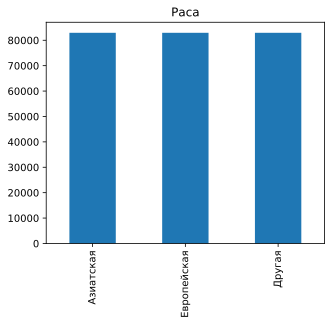

In [ ]:
df['Раса'].value_counts().plot(kind='bar')
plt.title('Раса')
plt.show()

In [ ]:
df.groupby('Раса')['Раса'].count()

Раса
Азиатская      82944
Другая         82944
Европейская    82944
Name: Раса, dtype: int64

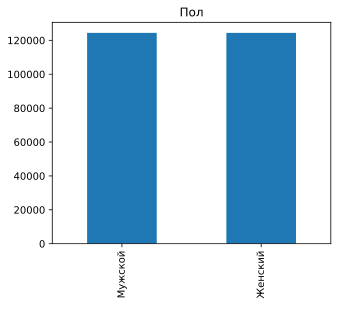

In [ ]:
df['Пол'].value_counts().plot(kind='bar')
plt.title('Пол')
plt.show()

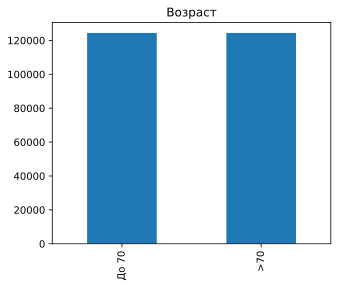

In [ ]:
df['Возраст'].value_counts().plot(kind='bar')
plt.title('Возраст')
plt.show()

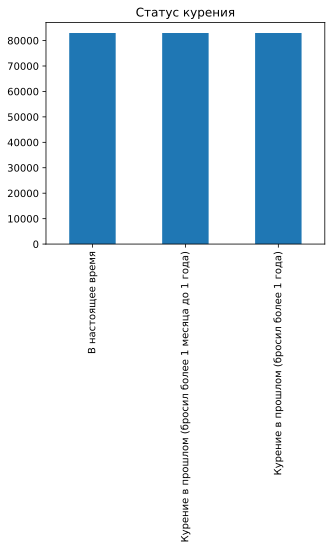

In [ ]:
df['Статус курения'].value_counts().plot(kind='bar')
plt.title('Статус курения')
plt.show()

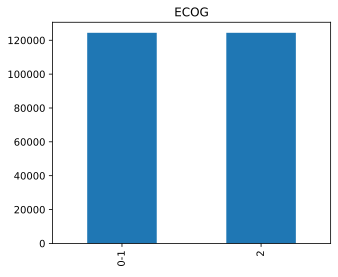

In [ ]:
df['ECOG'].value_counts().plot(kind='bar')
plt.title('ECOG')
plt.show()

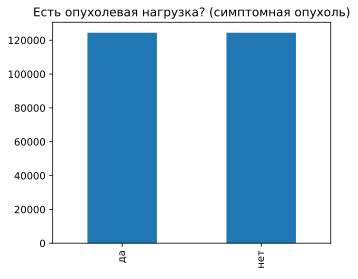

In [ ]:
df['Есть опухолевая нагрузка? (симптомная опухоль)'].value_counts().plot(kind='bar')
plt.title('Есть опухолевая нагрузка? (симптомная опухоль)')
plt.show()

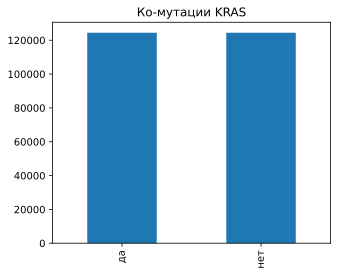

In [ ]:
df['Ко-мутации KRAS'].value_counts().plot(kind='bar')
plt.title('Ко-мутации KRAS')
plt.show()

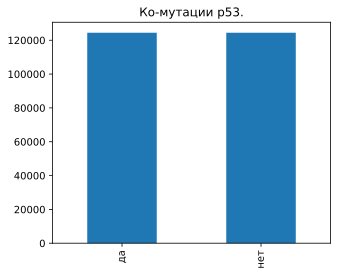

In [ ]:
df['Ко-мутации p53.'].value_counts().plot(kind='bar')
plt.title('Ко-мутации p53.')
plt.show()

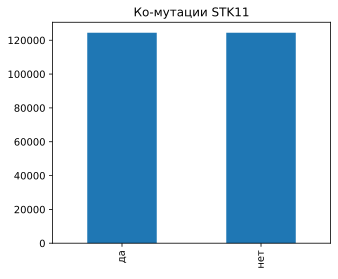

In [ ]:
df['Ко-мутации STK11'].value_counts().plot(kind='bar')
plt.title('Ко-мутации STK11')
plt.show()

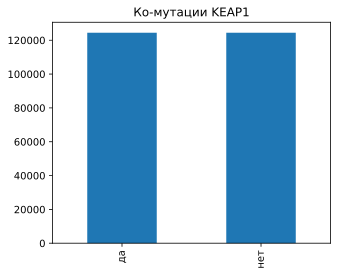

In [ ]:
df['Ко-мутации KEAP1'].value_counts().plot(kind='bar')
plt.title('Ко-мутации KEAP1')
plt.show()

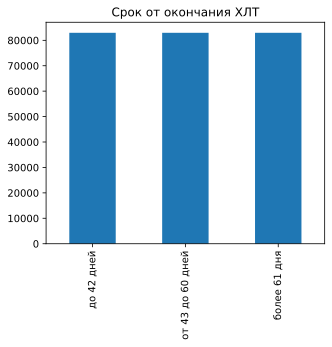

In [ ]:
df['Срок от окончания ХЛТ'].value_counts().plot(kind='bar')
plt.title('Срок от окончания ХЛТ')
plt.show()

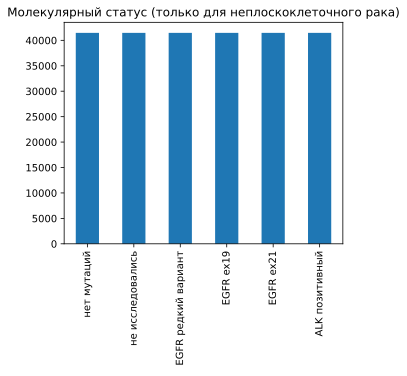

In [ ]:
df['Молекулярный статус (только для неплоскоклеточного рака)'].value_counts().plot(kind='bar')
plt.title('Молекулярный статус (только для неплоскоклеточного рака)')
plt.show()

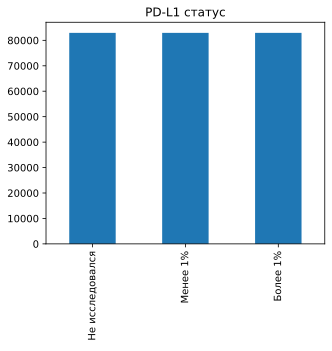

In [ ]:
df['PD-L1 статус'].value_counts().plot(kind='bar')
plt.title('PD-L1 статус')
plt.show()

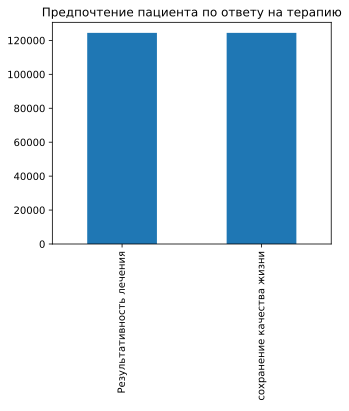

In [ ]:
df['Предпочтение пациента по ответу на терапию'].value_counts().plot(kind='bar')
plt.title('Предпочтение пациента по ответу на терапию')
plt.show()

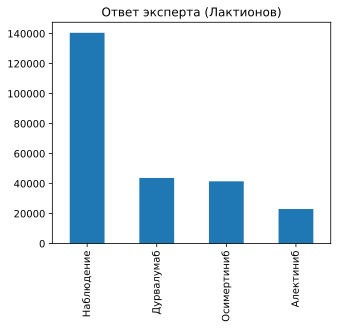

In [ ]:
df['Ответ эксперта (Лактионов)'].value_counts().plot(kind='bar')
plt.title('Ответ эксперта (Лактионов)')
plt.show()

In [ ]:
df.groupby('Ответ эксперта (Лактионов)')['Ответ эксперта (Лактионов)'].count()

Ответ эксперта (Лактионов)
Алектиниб       23040
Дурвалумаб      43776
Наблюдение     140544
Осимертиниб     41472
Name: Ответ эксперта (Лактионов), dtype: int64

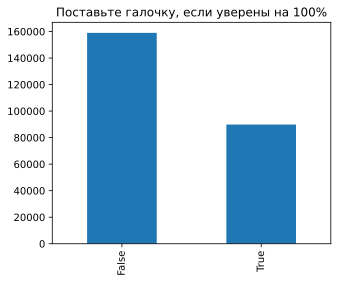

In [ ]:
df['Поставьте галочку, если уверены на 100%'].value_counts().plot(kind='bar')
plt.title('Поставьте галочку, если уверены на 100%')
plt.show()

In [ ]:
df.groupby('Поставьте галочку, если уверены на 100%')['Поставьте галочку, если уверены на 100%'].count()

Поставьте галочку, если уверены на 100%
False    158976
True      89856
Name: Поставьте галочку, если уверены на 100%, dtype: int64

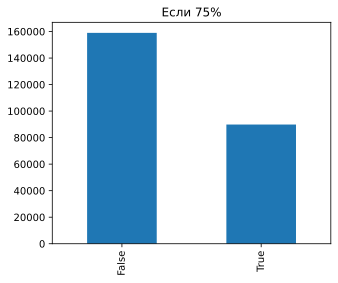

In [ ]:
df['Если 75%'].value_counts().plot(kind='bar')
plt.title('Если 75%')
plt.show()

In [ ]:
df.groupby('Если 75%')['Если 75%'].count()

Если 75%
False    158976
True      89856
Name: Если 75%, dtype: int64

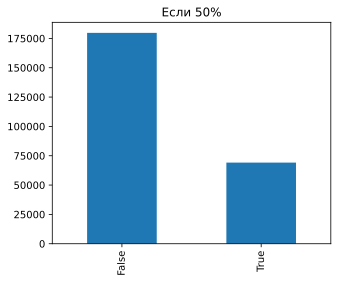

In [ ]:
df['Если 50%'].value_counts().plot(kind='bar')
plt.title('Если 50%')
plt.show()

In [ ]:
df.groupby('Если 50%')['Если 50%'].count()

Если 50%
False    179712
True      69120
Name: Если 50%, dtype: int64

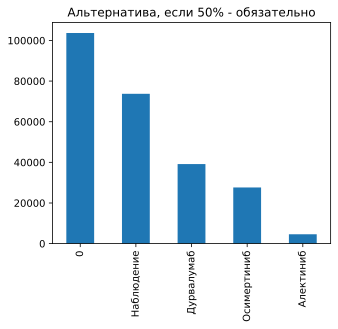

In [ ]:
df['Альтернатива, если 50% - обязательно'].value_counts().plot(kind='bar')
plt.title('Альтернатива, если 50% - обязательно')
plt.show()

In [ ]:
df.groupby('Альтернатива, если 50% - обязательно')['Альтернатива, если 50% - обязательно'].count()

Альтернатива, если 50% - обязательно
0              103680
Алектиниб        4608
Дурвалумаб      39168
Наблюдение      73728
Осимертиниб     27648
Name: Альтернатива, если 50% - обязательно, dtype: int64

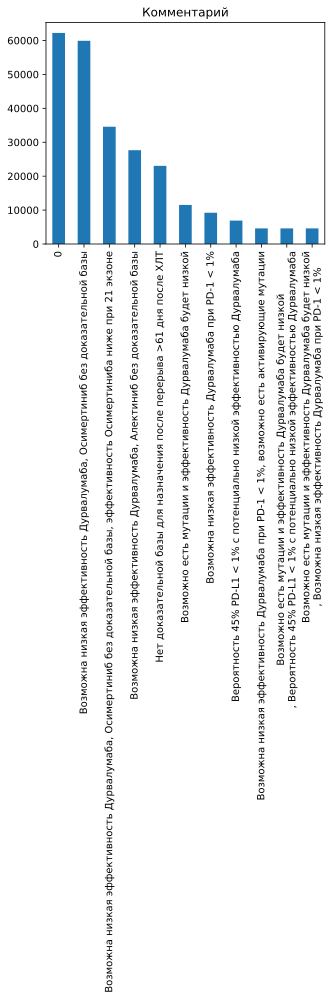

In [ ]:
df['Комментарий'].value_counts().plot(kind='bar')
plt.title('Комментарий')
plt.show()

In [ ]:
df.groupby('Комментарий')['Комментарий'].count()

Комментарий
0                                                                                                                                                62208
Вероятность 45% PD-L1 < 1% с потенциально низкой эффективностью Дурвалумаба                                                                       6912
Возможна низкая эффективность Дурвалумаба при PD-1 < 1%                                                                                           9216
Возможна низкая эффективность Дурвалумаба при PD-1 < 1%, возможно есть активирующие мутации                                                       4608
Возможна низкая эффективность Дурвалумаба, Алектиниб без доказательной базы                                                                      27648
Возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы                                                                    59904
Возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы, эфф

In [ ]:
for name, values in data_1.items():
  print("Столбец",name, ":", data_1[name].unique())

Столбец Раса : ['Азиатская' 'Европейская' 'Другая']
Столбец Пол : [' Мужской' ' Женский']
Столбец Возраст : [' До 70' ' >70']
Столбец Статус курения : [' В настоящее время'
 ' Курение в прошлом (бросил более 1 месяца до 1 года)'
 ' Курение в прошлом (бросил более 1 года)']
Столбец ECOG : [' 0-1' '2']
Столбец Есть опухолевая нагрузка? (симптомная опухоль) : [' да' ' нет']
Столбец Ко-мутации KRAS : [' да' ' нет']
Столбец Ко-мутации p53. : [' да' ' нет']
Столбец Ко-мутации STK11 : [' да' ' нет']
Столбец Ко-мутации KEAP1 : [' да' ' нет']
Столбец Срок от окончания ХЛТ : ['до 42 дней' 'от 43 до 60 дней' 'более 61 дня']
Столбец Молекулярный статус (только для неплоскоклеточного рака) : [' нет мутаций' ' не исследовались' ' EGFR редкий вариант' ' EGFR ex19'
 ' EGFR ex21' ' ALK позитивный']
Столбец PD-L1 статус : [' Не исследовался' ' Менее 1%' ' Более 1%']
Столбец Предпочтение пациента по ответу на терапию : [' Результативность лечения' ' сохранение качества жизни']
Столбец Ответ эксперта (Лак

In [ ]:
df_backup = df.copy()
df.head()

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
id_ответа,,,,,,,,,,,,,,,,,,,,
1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...


In [ ]:
df['Раса'] = df['Раса'].replace({'Другая': 0, 'Азиатская': 1, 'Европейская': 2})
df['Пол'] = df['Пол'].replace({' Женский': 0, ' Мужской': 1})
df['Возраст'] = df['Возраст'].replace({' До 70': 0, ' >70': 1})
df['Статус курения'] = df['Статус курения'].replace({' В настоящее время': 0, ' Курение в прошлом (бросил более 1 года)': 1, ' Курение в прошлом (бросил более 1 месяца до 1 года)': 2})
df['ECOG'] = df['ECOG'].replace({' 0-1': 0, '2': 1})
df['Есть опухолевая нагрузка? (симптомная опухоль)'] = df['Есть опухолевая нагрузка? (симптомная опухоль)'].replace({' да': 0, ' нет': 1})
df['Ко-мутации KRAS'] = df['Ко-мутации KRAS'].replace({' да': 0, ' нет': 1})
df['Ко-мутации p53.'] = df['Ко-мутации p53.'].replace({' да': 0, ' нет': 1})
df['Ко-мутации STK11'] = df['Ко-мутации STK11'].replace({' да': 0, ' нет': 1})
df['Ко-мутации KEAP1'] = df['Ко-мутации KEAP1'].replace({' да': 0, ' нет': 1})
df['Срок от окончания ХЛТ'] = df['Срок от окончания ХЛТ'].replace({'до 42 дней': 0, 'от 43 до 60 дней': 1, 'более 61 дня': 2})
df['Молекулярный статус (только для неплоскоклеточного рака)'] = df['Молекулярный статус (только для неплоскоклеточного рака)'].replace({' ALK позитивный': 0, ' EGFR ex19': 1, ' EGFR ex21': 2})
df['Молекулярный статус (только для неплоскоклеточного рака)'] = df['Молекулярный статус (только для неплоскоклеточного рака)'].replace({' EGFR редкий вариант': 3, ' не исследовались': 4, ' нет мутаций': 5})
df['PD-L1 статус'] = df['PD-L1 статус'].replace({' Более 1%': 0, ' Менее 1%': 1, ' Не исследовался': 2})
df['Предпочтение пациента по ответу на терапию'] = df['Предпочтение пациента по ответу на терапию'].replace({' Результативность лечения': 0, ' сохранение качества жизни': 1})
df['Ответ эксперта (Лактионов)'] = df['Ответ эксперта (Лактионов)'].replace({'Алектиниб': 0, 'Дурвалумаб': 1, 'Наблюдение': 2, 'Осимертиниб': 3})

In [ ]:
df

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
id_ответа,,,,,,,,,,,,,,,,,,,,
1,1,1,0,0,0,0,0,0,0,0,0,5,2,0,1,True,False,False,0,0
2,1,1,0,0,0,0,0,0,0,0,1,5,2,0,1,True,False,False,0,0
3,1,1,0,0,0,0,0,0,0,0,2,5,2,0,2,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
4,1,1,0,0,0,0,0,0,0,0,0,4,2,0,1,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
5,1,1,0,0,0,0,0,0,0,0,1,4,2,0,1,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248828,0,0,1,1,1,1,1,1,1,1,1,2,0,1,2,False,False,True,Осимертиниб,"Возможна низкая эффективность Дурвалумаба, Оси..."
248829,0,0,1,1,1,1,1,1,1,1,2,2,0,1,2,True,False,False,0,0
248830,0,0,1,1,1,1,1,1,1,1,0,0,0,1,0,False,False,True,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але..."


In [ ]:
rcParams['figure.figsize'] = 12, 8

<ipython-input-55-7ec92bc3cc82>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr('spearman')


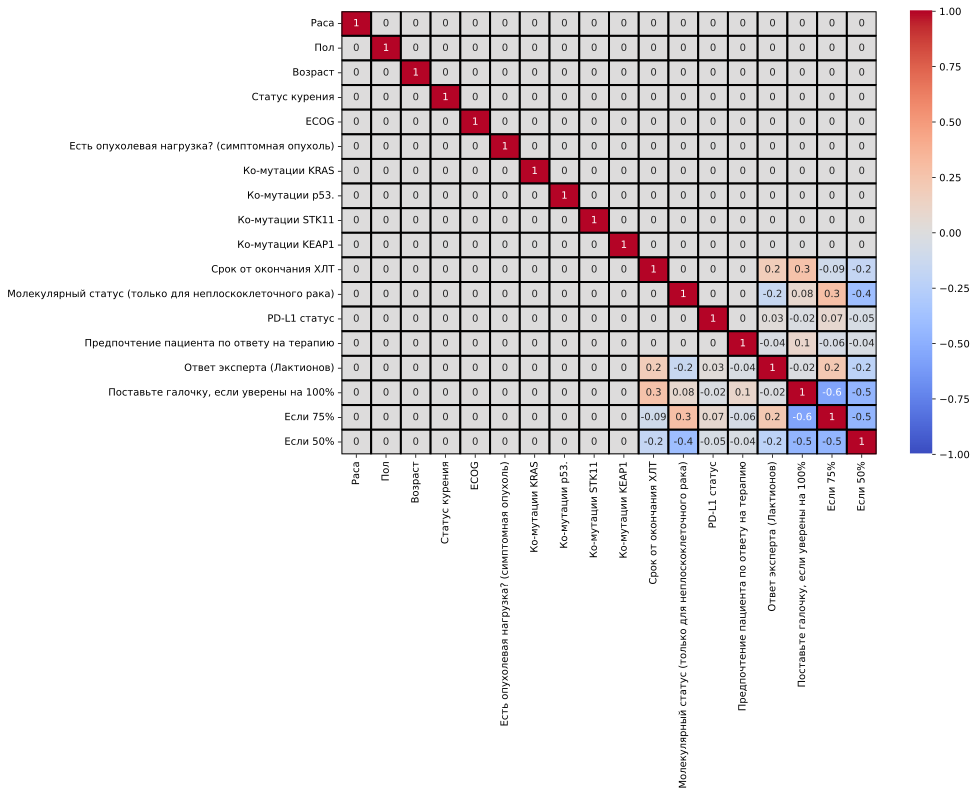

In [ ]:
corr_matrix = df.corr('spearman')
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g')
plt.show()

In [ ]:
df_mdf = df.iloc[:,0:15]

In [ ]:
df_mdf

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов)
id_ответа,,,,,,,,,,,,,,,
1,1,1,0,0,0,0,0,0,0,0,0,5,2,0,1
2,1,1,0,0,0,0,0,0,0,0,1,5,2,0,1
3,1,1,0,0,0,0,0,0,0,0,2,5,2,0,2
4,1,1,0,0,0,0,0,0,0,0,0,4,2,0,1
5,1,1,0,0,0,0,0,0,0,0,1,4,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248828,0,0,1,1,1,1,1,1,1,1,1,2,0,1,2
248829,0,0,1,1,1,1,1,1,1,1,2,2,0,1,2
248830,0,0,1,1,1,1,1,1,1,1,0,0,0,1,0


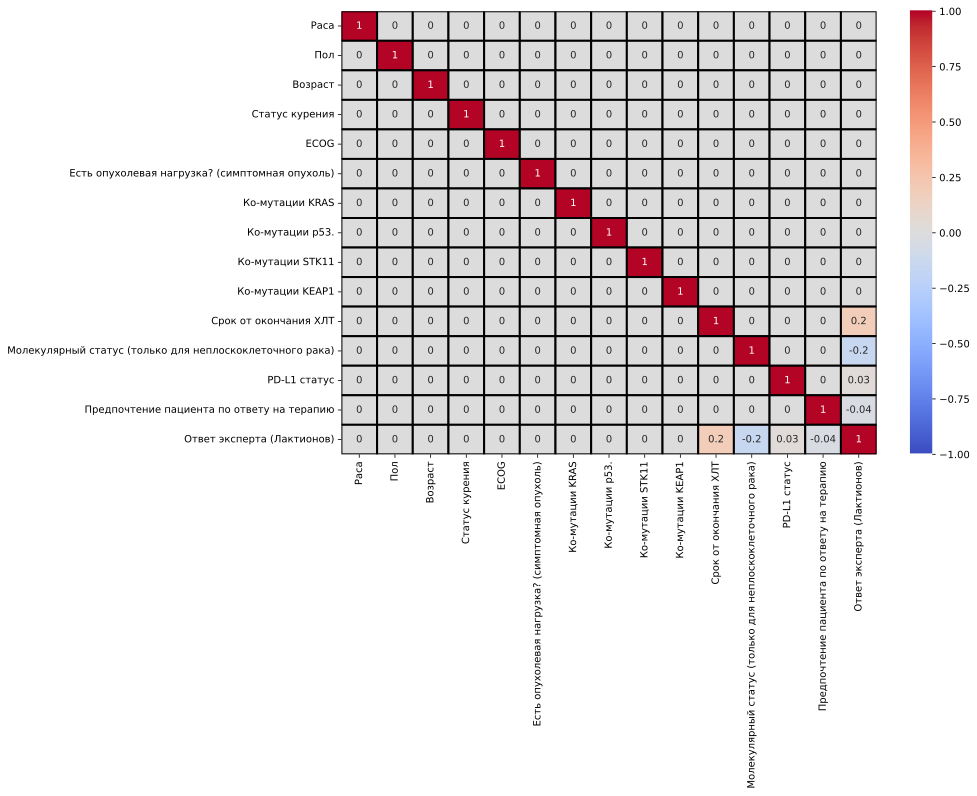

In [ ]:
corr_matrix = df_mdf.corr('spearman')
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
X = df_mdf.iloc[:,0:14]
Y = df_mdf.iloc[:,-1]

In [ ]:
bestfeauters = SelectKBest(score_func=chi2, k=14  )
fit = bestfeauters.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns= ['Specs','Score']
print(featureScores.nlargest(14,'Score'))

                                                Specs         Score
11  Молекулярный статус (только для неплоскоклеточ...  1.369749e+05
10                              Срок от окончания ХЛТ  6.365898e+04
13         Предпочтение пациента по ответу на терапию  4.379389e+03
12                                       PD-L1 статус  1.472850e+03
0                                                Раса  3.547142e-20
3                                      Статус курения  3.547142e-20
1                                                 Пол  1.773571e-20
2                                             Возраст  1.773571e-20
4                                                ECOG  1.773571e-20
5      Есть опухолевая нагрузка? (симптомная опухоль)  1.773571e-20
6                                     Ко-мутации KRAS  1.773571e-20
7                                     Ко-мутации p53.  1.773571e-20
8                                    Ко-мутации STK11  1.773571e-20
9                                    Ко-мутации 

[8.04620876e-18 0.00000000e+00 0.00000000e+00 1.12475079e-17
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.21348942e-01 5.77837420e-01
 5.39228138e-02 4.68908240e-02]


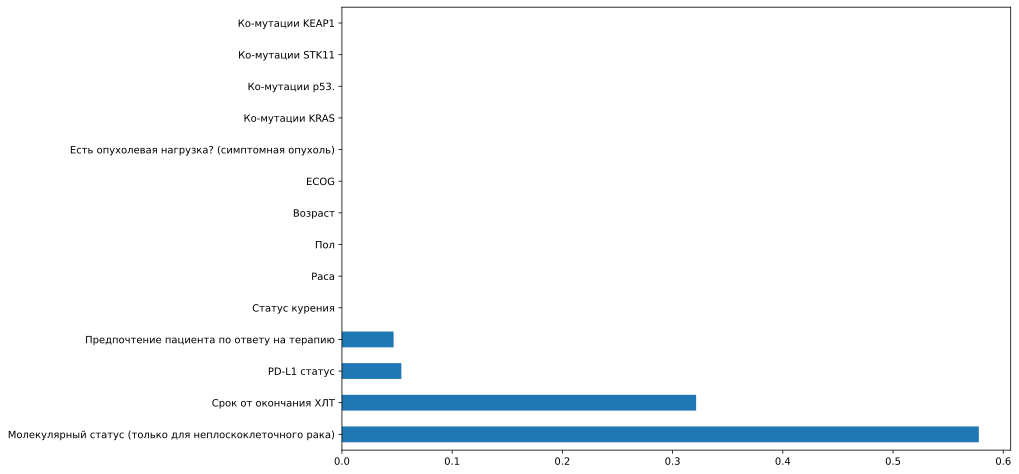

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(14).plot(kind = 'barh')
plt.show()

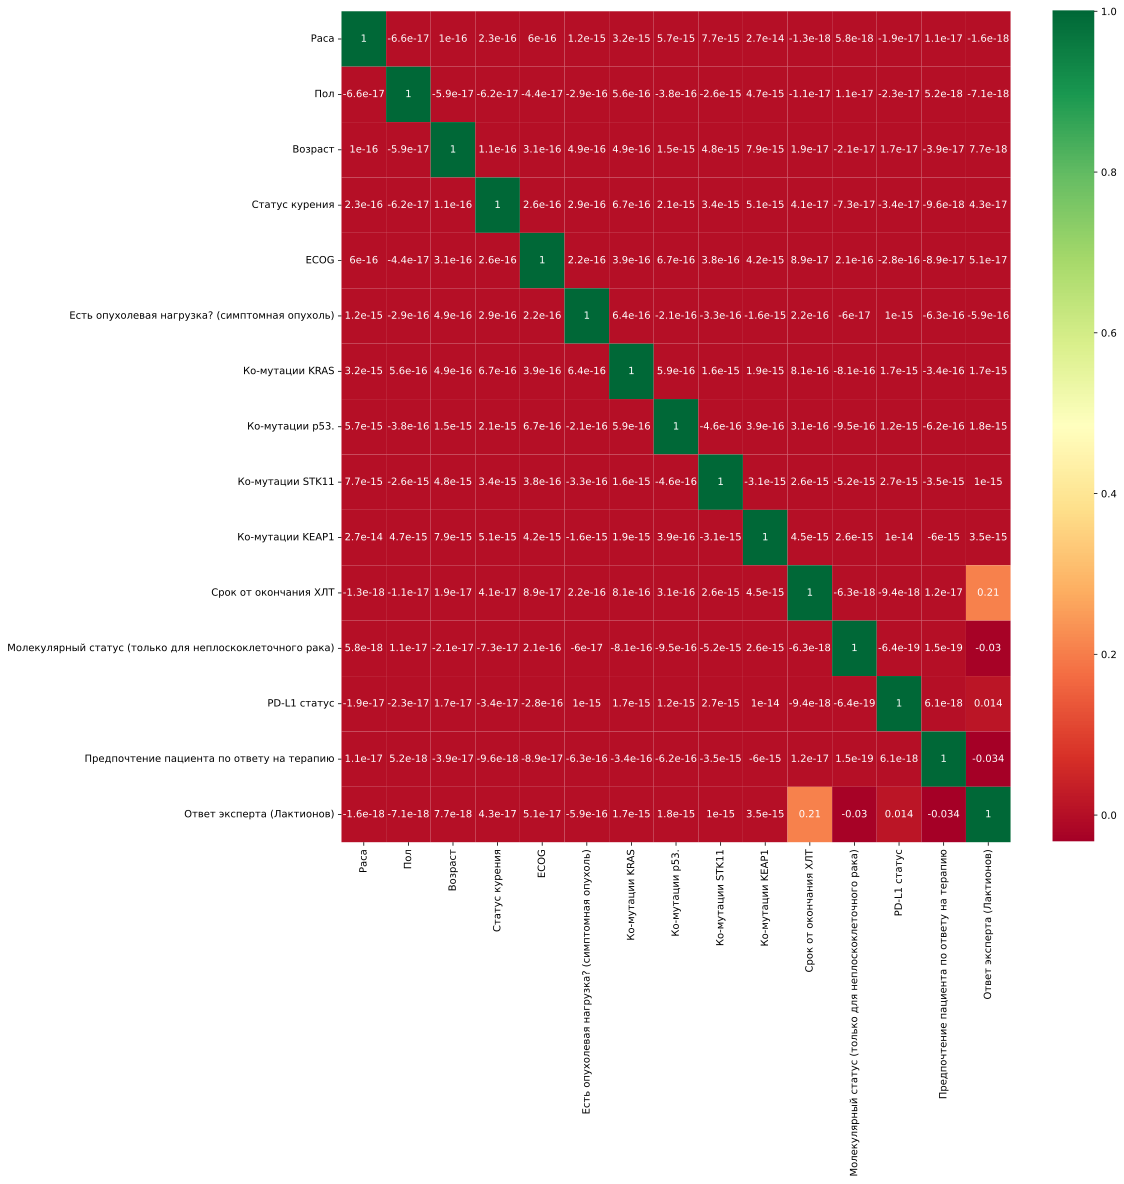

In [ ]:
import seaborn as sns
corrmat = df_mdf.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15 , 15))
q=sns.heatmap(df_mdf[top_corr_features].corr(),annot=True, cmap='RdYlGn')

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

In [ ]:
clf = LassoCV(cv=5)

In [ ]:
sfm = SelectFromModel(clf)
sfm.fit(X,Y)

SelectFromModel(estimator=LassoCV(cv=5))

In [ ]:
n_features = sfm.transform(X).shape[1]
n_features

4

In [ ]:
sfm.transform(X)

array([[0, 5, 2, 0],
       [1, 5, 2, 0],
       [2, 5, 2, 0],
       ...,
       [0, 0, 0, 1],
       [1, 0, 0, 1],
       [2, 0, 0, 1]])

In [ ]:
sfm.get_support()

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True])

In [ ]:
df_mdf

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов)
id_ответа,,,,,,,,,,,,,,,
1,1,1,0,0,0,0,0,0,0,0,0,5,2,0,1
2,1,1,0,0,0,0,0,0,0,0,1,5,2,0,1
3,1,1,0,0,0,0,0,0,0,0,2,5,2,0,2
4,1,1,0,0,0,0,0,0,0,0,0,4,2,0,1
5,1,1,0,0,0,0,0,0,0,0,1,4,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248828,0,0,1,1,1,1,1,1,1,1,1,2,0,1,2
248829,0,0,1,1,1,1,1,1,1,1,2,2,0,1,2
248830,0,0,1,1,1,1,1,1,1,1,0,0,0,1,0


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
17916/17916 [==============================] - 44s 2ms/step - loss: 0.0536 - accuracy: 0.9826 - val_loss: 1.4402e-06 - val_accuracy: 1.0000
Epoch 2/20
17916/17916 [==============================] - 42s 2ms/step - loss: 5.8400e-04 - accuracy: 0.9999 - val_loss: 2.4289e-06 - val_accuracy: 1.0000
Epoch 3/20
17916/17916 [==============================] - 40s 2ms/step - loss: 3.8777e-07 - accuracy: 1.0000 - val_loss: 3.9643e-09 - val_accuracy: 1.0000
Epoch 4/20
17916/17916 [==============================] - 41s 2ms/step - loss: 2.2995e-04 - accuracy: 0.9999 - val_loss: 2.0597e-06 - val_accuracy: 1.0000
Epoch 5/20
17916/17916 [==============================] - 44s 2ms/step - loss: 2.4545e-07 - accuracy: 1.0000 - val_loss: 5.6889e-10 - val_accuracy: 1.0000
Epoch 6/20
17916/17916 [==============================] - 40s 2ms/step - loss: 5.7408e-04 - accuracy: 0.9999 - val_loss: 3.8215e-07 - val_accuracy: 1.0000
Epoch 7/20
17916/17916 [==============================] - 40s 2ms/step - l

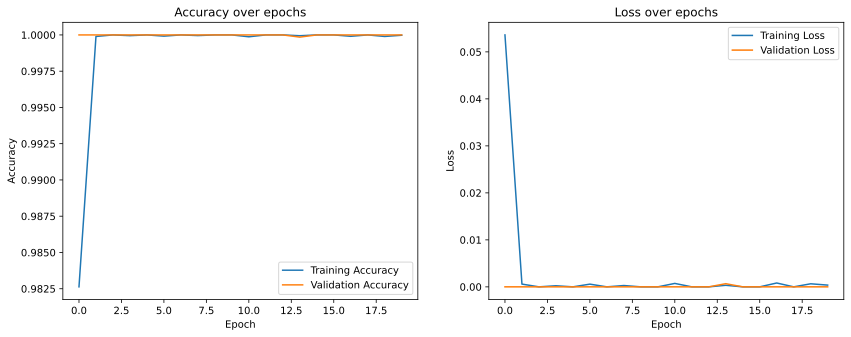

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# Загрузка данных
# data = pd.read_csv('path_to_your_data.csv')  # Укажите путь к файлу данных

# Разделение данных на входные и целевые переменные
X = df_mdf.iloc[:, :-1]  # все столбцы кроме последнего
y = df_mdf.iloc[:, -1]   # последний столбец

# Кодирование целевой переменной в формат one-hot
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.values.reshape(-1, 1))

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание модели
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))  # Слой с 64 нейронами и функцией активации ReLU
model.add(Dense(32, activation='relu'))  # Еще один скрытый слой с 32 нейронами
model.add(Dense(y.shape[1], activation='softmax'))  # Выходной слой с количеством нейронов равным количеству классов

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_split=0.1)

# Оценка модели
_, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

# Построение графиков
plt.figure(figsize=(14, 5))

# График точности
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# График функции потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                960       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 4)                 132       
                                                                 
Total params: 3172 (12.39 KB)
Trainable params: 3172 (12.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
17916/17916 [==============================] - 44s 2ms/step - loss: 0.0698 - accuracy: 0.9733 - val_loss: 0.0030 - val_accuracy: 0.9986
Epoch 2/20
17916/17916 [==============================] - 45s 3ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 2.5055e-05 - val_accuracy: 1.0000
Epoch 3/20
17916/17916 [==============================] - 45s 2ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 1.6438e-05 - val_accuracy: 1.0000
Epoch 4/20
17916/17916 [==============================] - 45s 3ms/step - loss: 0.0038 - accuracy: 0.9990 - val_loss: 1.9561e-05 - val_accuracy: 1.0000
Epoch 5/20
17916/17916 [==============================] - 45s 3ms/step - loss: 0.0041 - accuracy: 0.9990 - val_loss: 4.5342e-06 - val_accuracy: 1.0000
Epoch 6/20
17916/17916 [==============================] - 44s 2ms/step - loss: 0.0035 - accuracy: 0.9990 - val_loss: 1.8025e-05 - val_accuracy: 1.0000
Epoch 7/20
17916/17916 [==============================] - 44s 2ms/step - loss: 0.0029 - accuracy: 

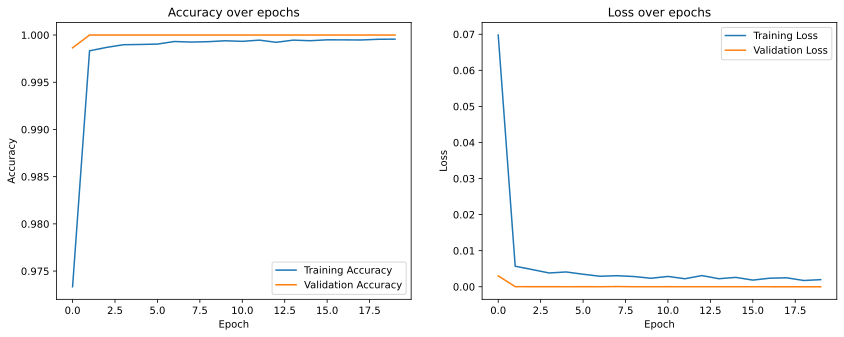

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# Загрузка данных
# data = pd.read_csv('path_to_your_data.csv')  # Укажите путь к файлу данных

# Разделение данных на входные и целевые переменные
X = df_mdf.iloc[:, :-1]  # все столбцы кроме последнего
y = df_mdf.iloc[:, -1]   # последний столбец

# Кодирование целевой переменной в формат one-hot
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.values.reshape(-1, 1))

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание модели
model = Sequential()
model.add(Dense(140, input_dim=X.shape[1], activation='relu'))  # Слой с 64 нейронами и функцией активации ReLU
model.add(Dropout(0.3))
model.add(Dense(70, activation='relu'))  # Еще один скрытый слой с 32 нейронами
model.add(Dense(y.shape[1], activation='softmax'))  # Выходной слой с количеством нейронов равным количеству классов

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_split=0.1)

# Оценка модели
_, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

# Построение графиков
plt.figure(figsize=(14, 5))

# График точности
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# График функции потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 140)               2100      
                                                                 
 dropout (Dropout)           (None, 140)               0         
                                                                 
 dense_8 (Dense)             (None, 70)                9870      
                                                                 
 dense_9 (Dense)             (None, 4)                 284       
                                                                 
Total params: 12254 (47.87 KB)
Trainable params: 12254 (47.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
